# **DDoS Model Training (Gradient Boost)**
---

## **Imports and Configuration**
---

In [3]:
import json
import numpy as np
import os
import pandas as pd
import pickle
import warnings

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [4]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [5]:
# Data, encoders and normalizer paths
dataset_name = '75-20-05-udplag.syn'

input_path = os.path.join('data/clean', dataset_name)
encoders_path = os.path.join(input_path, 'encoders')
stats_path = os.path.join(input_path, 'stats')
data_path = os.path.join(input_path, 'split-sets-balanced-smote')

# Model paths settings
model_type = 'gradient-boost' # <- Change for other models
models_path = os.path.join('models', model_type)

## **Load Encoders and Normalizing Stats**
---

In [6]:
# Load label encoder
with open(os.path.join(encoders_path, 'label-encoder.pkl'), 'rb') as file:
    label_encoder = pickle.load(file)

# Load one-hot encoder
with open(os.path.join(encoders_path, 'onehot-encoder.pkl'), 'rb') as file:
    onehot_encoder = pickle.load(file)
    
# Load standard scaler
with open(os.path.join(stats_path, 'standard-scaler.pkl'), 'rb') as file:
    standard_scaler = pickle.load(file)

## **Load Data**
---

In [7]:
# Load Data
X_train = pd.read_csv(os.path.join(data_path, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(data_path, 'y_train.csv'))
X_val = pd.read_csv(os.path.join(data_path, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(data_path, 'y_val.csv'))
X_test = pd.read_csv(os.path.join(data_path, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(data_path, 'y_test.csv'))

In [8]:
unique_labels = y_train['Label'].unique()
print(f'Unique labels = {unique_labels}')

Unique labels = ['Syn/UDPLag' 'DNS/LDAP' 'NetBIOS/Portmap' 'MSSQL' 'SNMP' 'SSDP/UDP' 'NTP'
 'TFTP' 'BENIGN']


## **Normalize and Transform (X, y) Data**
---

In [9]:
# Standard normalization of X
X_train = standard_scaler.transform(X_train)
X_val = standard_scaler.transform(X_val)
X_test = standard_scaler.transform(X_test)

In [ ]:
# L2 normalization and quantile transformation of X
X_train = l2_normalizer.transform(X_train)
X_val = l2_normalizer.transform(X_val)
X_test = l2_normalizer.transform(X_test)

X_train = quantile_transformer.transform(X_train)
X_val = quantile_transformer.transform(X_val)
X_test = quantile_transformer.transform(X_test)

In [10]:
# One-hot encoding of y
y_train_onehot = onehot_encoder.transform(y_train)
y_val_onehot = onehot_encoder.transform(y_val)
y_test_onehot = onehot_encoder.transform(y_test)

# Label encoding of y
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [11]:
print(f'       X_train.shape = {X_train.shape}')
print(f'       y_train.shape = {y_train.shape}')
print(f'y_train_onehot.shape = {y_train_onehot.shape}\n')

print(f'         X_val.shape = {X_val.shape}')
print(f'         y_val.shape = {y_val.shape}')
print(f'  y_val_onehot.shape = {y_val_onehot.shape}\n')

print(f'        X_test.shape = {X_test.shape}')
print(f'        y_test.shape = {y_test.shape}')
print(f' y_test_onehot.shape = {y_test_onehot.shape}')

       X_train.shape = (11916819, 78)
       y_train.shape = (11916819,)
y_train_onehot.shape = (11916819, 9)

         X_val.shape = (1770568, 78)
         y_val.shape = (1770568,)
  y_val_onehot.shape = (1770568, 9)

        X_test.shape = (442643, 78)
        y_test.shape = (442643,)
 y_test_onehot.shape = (442643, 9)


## **Model Settings**
---

In [10]:
# Model hyperparameter definition
# Debería hacer una grid?
model_props = {
    "learning_rate": 0.1,
    "n_estimators": 50,
    "criterion":'friedman_mse',
    "max_depth": 3,
    "verbose": 1,
}

In [11]:
# Model definition
model = GradientBoostingClassifier(**model_props)
model

GradientBoostingClassifier()

In [12]:
model_props = {
    # "learning_rate": 0.1,
    # "n_estimators": 50,
    # "criterion":'friedman_mse',
    # "max_depth": 3,
    "verbose": 1,
}

In [13]:
model = HistGradientBoostingClassifier(**model_props)
model

HistGradientBoostingClassifier(verbose=1)

<h2> 
    Grid Search 
    <span style="color: red; font-size: 10px;">No se está usando</span>
</h2>
---

In [12]:
grid_props = {
    "learning_rate": [0.1],
    "n_estimators": [100],
    "criterion":['friedman_mse'],
    "max_depth": [3],
}

In [13]:
grid_search = GridSearchCV(model, grid_props, cv=5, scoring='accuracy', verbose=3)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


In [ ]:
grid_search.best_params_

## **Model Training and Persistence**
---

In [14]:
# Model training
model.fit(X_train, y_train)

Binning 6.692 GB of training data: 9.651 s
1.471 s 0.744 GB of validation data: 
Fitting gradient boosted rounds:
Fit 423 trees in 877.604 s, (13113 total leaves)
Time spent computing histograms: 642.733s
Time spent finding best splits:  1.523s
Time spent applying splits:      38.554s
Time spent predicting:           20.135s


HistGradientBoostingClassifier(verbose=1)

In [15]:
# Define normalize method name
normalize_name = 'standard-v2'

# Save model
with open(os.path.join(models_path, f'model-gb-{normalize_name}.object.pkl'), 'wb') as file:
    pickle.dump(model, file)

In [16]:
# Save model history
history = {
    'hyperparameters': model.get_params(),
    'feature_importances': list(model.feature_importances_)
}

with open(os.path.join(models_path, f'model-gb-{normalize_name}.history.json'), 'w') as file:
    json.dump(history, file)

AttributeError: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_'

## **Model Evaluation**
---

In [17]:
y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)

print(f'Accuracy = {accuracy_score(y_test, y_pred)}\n')
print(classification_report(y_test, y_pred, target_names=list(label_encoder.classes_)))

Accuracy = 0.9080477947239649

                 precision    recall  f1-score   support

         BENIGN       0.97      1.00      0.99      2827
       DNS/LDAP       0.82      0.80      0.81     40987
          MSSQL       0.92      0.93      0.92     48599
            NTP       0.99      1.00      0.99     48900
NetBIOS/Portmap       0.93      0.88      0.90     58680
           SNMP       0.73      0.81      0.77     49756
       SSDP/UDP       0.95      0.95      0.95     56214
     Syn/UDPLag       0.93      0.97      0.95     87766
           TFTP       0.99      0.87      0.92     48914

       accuracy                           0.91    442643
      macro avg       0.91      0.91      0.91    442643
   weighted avg       0.91      0.91      0.91    442643



In [39]:
clases = sorted(list(set(y_test)))  # o bien: np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=clases)
print("Matriz de confusión:")
print(cm)

cm = np.array(cm)

Matriz de confusión:
[[ 2856     1     0     1     0     0     0     0     0     0]
 [   31 32713   734   203   102  7640    91     6     0    63]
 [    6  1431 45090   209     0  1217   250    20    61    15]
 [   81    38    13 48712    39     9     0     3     0    16]
 [   10    48  2368    30 51196  5101    49    34     8     6]
 [   13  4678   170    12  4242 40405    27     1     0    43]
 [   35   140  1193    31    12  1824 52758     5     5   397]
 [   49     0    63     0     0     1    21 53254     8 18834]
 [    7     2     1     0     0    16     0     0 41830  6963]
 [   17    10    35     2     0   143  2055     6    10 14447]]


In [69]:
norm_cm = cm / cm.sum(axis=1, keepdims=True)*100
norm_cm;

In [68]:
norm_cm_T = cm.T / cm.sum(axis=0, keepdims=True)*100
norm_cm_T;

## **Plots**
---

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

### Confusion Matrix
---

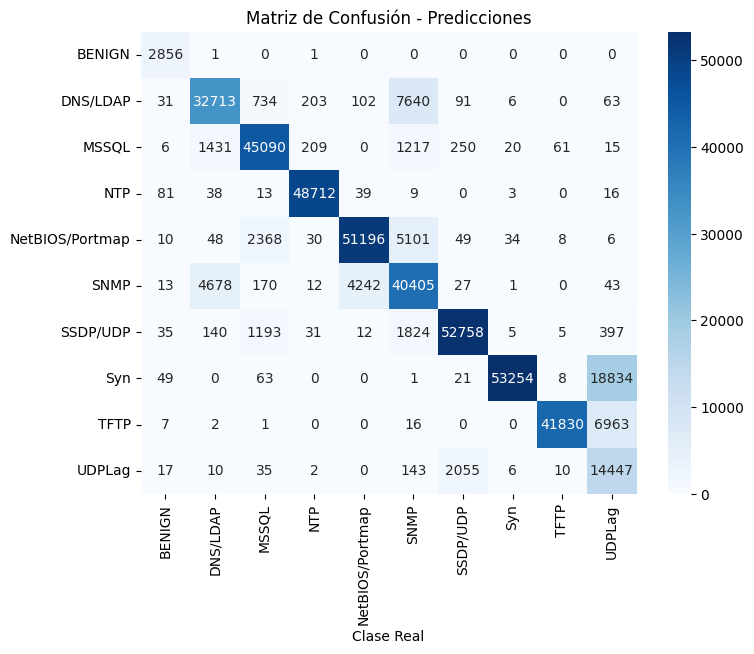

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(label_encoder.classes_), yticklabels=list(label_encoder.classes_))
# plt.xlabel('Clase Predicha')
plt.xlabel('Clase Real')
plt.title('Matriz de Confusión - Predicciones')
plt.show()

### Porcentaje de predicciones (columnas)
---
Muestra cuantas de las etiquetas predichas como una clase, eran en realidad de otra

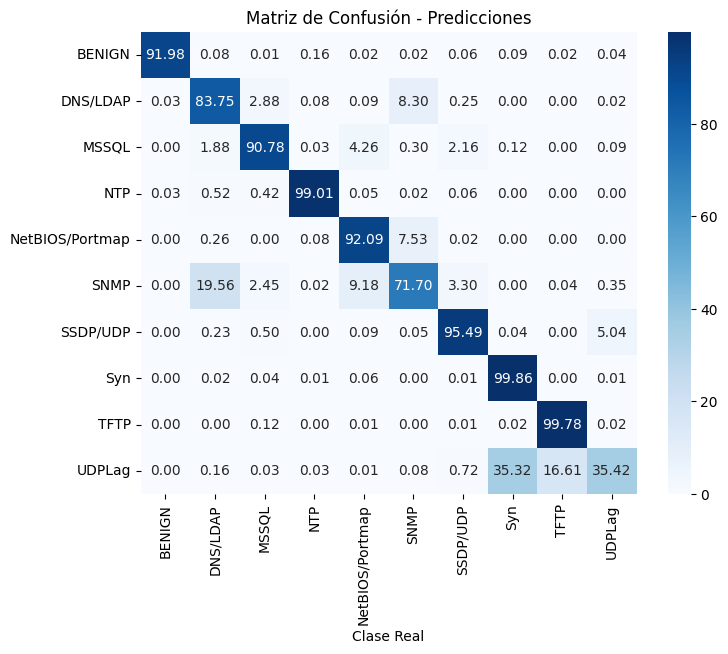

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(norm_cm_T, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=list(label_encoder.classes_), yticklabels=list(label_encoder.classes_))
# plt.xlabel('Clase Predicha')
plt.xlabel('Clase Real')
plt.title('Matriz de Confusión - Predicciones')
plt.show()

In [72]:
norm_cm_T.diagonal().sum()/10

np.float64(85.98629539794148)

### Porcentaje medidas (filas)
---
Muestra que de todas las etiquetas de una clase (fila), a cuantas llamó de otra clase

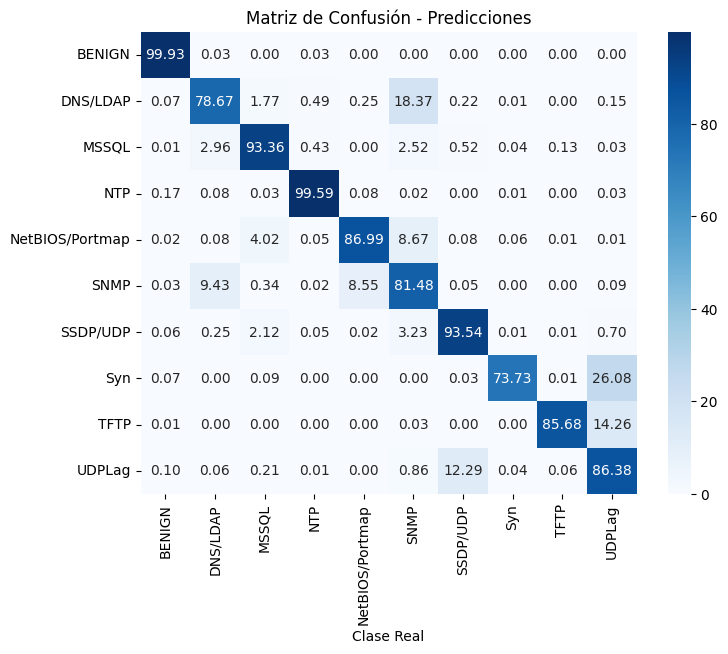

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(norm_cm, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=list(label_encoder.classes_), yticklabels=list(label_encoder.classes_))
# plt.xlabel('Clase Predicha')
plt.xlabel('Clase Real')
plt.title('Matriz de Confusión - Predicciones')
plt.show()

In [75]:
norm_cm.diagonal().sum()/10

np.float64(87.93532722611454)